In [4]:
import torch.tensor as tensor

# to read dictionary from file:
f = open(f'../trained_models/MNIST/interp_reg_tests3/performance.txt','r')
d = eval(f.read())
d_new = {}
all_coords = []
final_accs = []
net_names = list(d.keys())

for net_name in net_names:
    j = d[net_name][3]
    i = d[net_name][4]
    coords = list(zip(i,j))
    all_coords.extend(coords)
    final_acc = d[net_name][2][-1]
    final_accs.append(final_acc)
    d_new[net_name] = [coords, final_acc]

final test accuracies for each net: [99.26, 99.27, 99.26, 99.31, 99.19, 98.94, 98.59]
data1: mean=8.375 stdv=10.431
data2: mean=128.067 stdv=154.106
covariance = [[  108.91622701  1494.13472836]
 [ 1494.13472836 23771.44530914]]
covariance = 0.9285721886745657
covariance = 0.8912516521816345


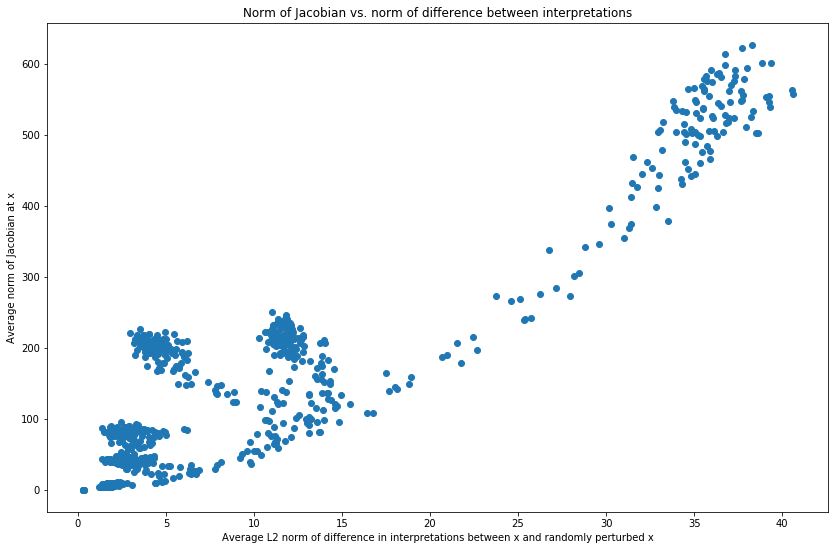

In [11]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

all_coords = np.array(all_coords)
x,y = all_coords[:,0], all_coords[:,1]

# summarize
print(f'final test accuracies for each net: {final_accs}')
print('data1: mean=%.3f stdv=%.3f' % (np.mean(x), np.std(x)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(y), np.std(y)))
print(f'covariance = {np.cov(x,y)}')
print(f'covariance = {ss.pearsonr(x,y)[0]}')
print(f'covariance = {ss.spearmanr(x,y)[0]}')

# plot
plt.figure(figsize=(14,9))
plt.xlabel("Average L2 norm of difference in interpretations between x and randomly perturbed x")
plt.ylabel("Average norm of Jacobian at x")
plt.title("Norm of Jacobian vs. norm of difference between interpretations")
plt.scatter(x, y)
plt.show()